# Title(暂定): Performance Comparison of Various BERT Models on Small-Scale Binary Classification Tasks

# 1. Abstract


Bidirectional Encoder Representations from Transformers (BERT) is a powerful language model that has achieved state-of-the-art performance on various natural language processing (NLP) tasks. In this study, we compare the performance of various BERT-based models on small-scale datasets, using different contextual inputs, to evaluate their efficacy using precision and runtime metrics. Our findings indicate that the performance of BERT-based models varies across datasets and domains, emphasizing the importance of selecting the appropriate model for specific tasks. Some BERT models perform better on certain tasks than others, highlighting the need for fine-tuning models for optimal performance. Our research contributes to the literature on NLP and highlights the potential of BERT-based models in various contexts.

# 2. Background

Natural language understanding is a fundamental task of artificial intelligence with a wide range of applications in areas such as machine translation, sentiment analysis, and chatbots. However, it is also a challenging problem due to the complexity of language, which exhibits many nuances requiring deep contextual and semantic understanding. Traditional models, such as recurrent neural networks and convolutional neural networks, were not efficient in capturing long-range dependencies, making them less effective for natural language processing (NLP) tasks. In contrast, the Transformer architecture, which relies on self-attention mechanisms to attend to different parts of the input sequence and create a better representation, was introduced as a more effective solution for NLP tasks.

The main contribution of Transformer-based models is the pre-training technique, where the model is trained on a large corpus of text to learn the language's representation. BERT, RoBERTa, XLM, and ALBERT are examples of pre-trained models that have shown state-of-the-art performance in various NLP tasks. However, it is important to note that their performance is not always consistent and may vary depending on the task. For instance, in a machine translation task, the Transformer architecture is able to capture complex relationships between words in the source and target languages, resulting in more accurate translations. On the other hand, if the input text has significant noise or if it is from a domain that the model has not been trained on, the performance of the Transformer model may be negatively impacted. For example, if the model has been trained on news articles but is applied to informal social media text, it may struggle to generate coherent and contextually accurate responses.

Therefore, while Transformer-based models have shown impressive performance in various NLP tasks, their performance may not always be linearly related and may require further investigation to optimize their use. In this paper, we explore the existing research on various Transformer-based models, including BERT, RoBERTa, XLM, and ALBERT, and propose potentially more efficient and scalable architectures for processing and generating natural language text. Our goal is to compare performance of their fine-tuning stage on a variety of NLP tasks. To this end, we conduct comparative experiments to infer changes in performance based on the models' properties. By doing so, we aim to contribute to the development of more effective and efficient natural language processing solutions.

## 2.1 Transformer

**Citation: ATTENTION IS ALL YOU NEED**

As the algorithms examined and evaluated in this paper are variants of BERT that are based on the transformer architecture, a brief introduction to the transformer is deemed essential. Transformers are a type of neural network architecture that has garnered significant attention in recent years due to their impressive performance on various natural language processing (NLP) tasks. At a high level, a transformer consists of two essential components: an encoder and a decoder, both of which contain multiple layers of self-attention and feedforward neural networks.

The encoder component is responsible for processing the input sequence, which it does through a series of N identical layers, each of which contains two sub-layers. The first sub-layer is a multi-head self-attention layer that treats the embedded input as both query and key to compute the attention scores. The second sub-layer is a position-wise fully connected feedforward network.

The decoder component, on the other hand, generates the output sequence and contains N identical layers, each of which has three sub-layers. The first sub-layer is a masked multi-head self-attention layer that allows the decoder to only attend to previous positions in the output sequence. The second sub-layer is another multi-head attention layer that uses the encoder outputs as its query and key. Finally, the third sub-layer is a position-wise fully connected feedforward network.

The final output of a transformer model is typically generated through a linear transformation followed by a softmax activation function. The linear transformation maps the output of the last decoder layer to a vector in the same dimensionality as the vocabulary size, where each element in the vector corresponds to the probability of the corresponding word in the vocabulary being the next word in the output sequence.

All sub-layers of the encoder and decoder components are combined with skip connections to facilitate training and prevent the vanishing gradient problem. Additionally, the transformer uses positional encoding to capture the positional information of the input sequence, which is critical for modeling the order of the words in the sequence.

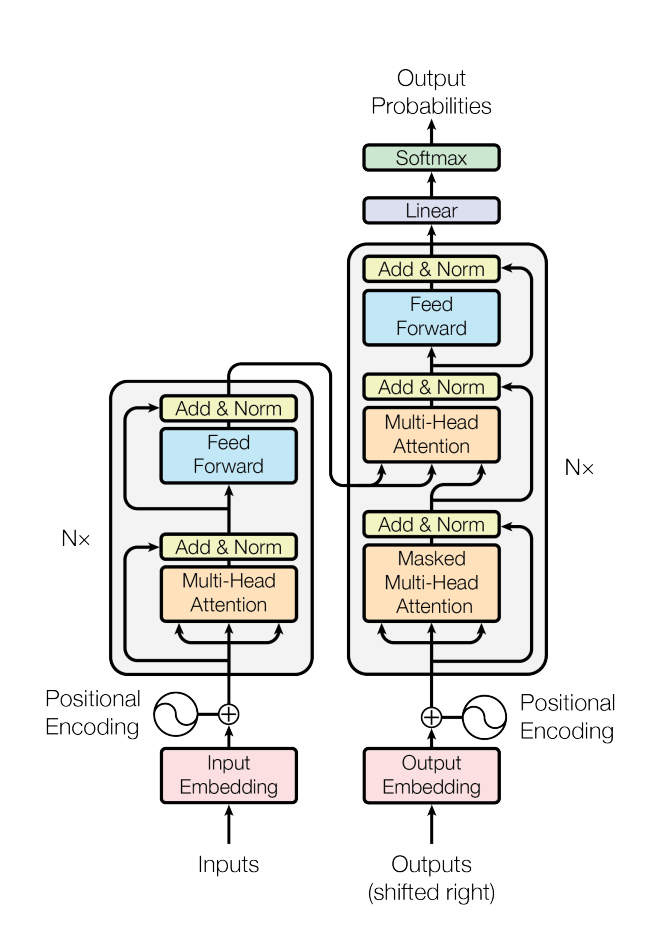

## 2.2 Choosing data sets

We choose three datasets for comparassion:

SST: The SST (Stanford Sentiment Treebank) dataset consists of movie review sentences with human-annotated sentiment labels. The sentence lengths are variable, and some sentences are quite long while others are short.

CoLA: The CoLA (Corpus of Linguistic Acceptability) dataset consists of English sentences that are grammatically correct or not. The sentences are relatively short and contain various types of grammatical errors, such as gender mismatches, missing words, or extra words.

MRPC: The MRPC (Microsoft Research Paraphrase Corpus) dataset contains pairs of long sentences, where each pair may be either a paraphrase or not. The dataset is imbalanced, with 68% of the samples being positive and 32% being negative.

These datasets are chosen for different reasons. SST is a popular dataset for sentiment analysis tasks, and the human annotations provide a high-quality source of labeled data. CoLA is used to evaluate models' ability to handle grammatically correct sentences, which is important for natural language processing tasks. MRPC is used to evaluate models' ability to identify paraphrases, which is essential for tasks such as question answering or machine translation. All three datasets provide unique challenges to machine learning models and are widely used for evaluating the performance of models in natural language processing tasks.

# 3. Analysis and Test

## 3.1 Analysis of models

 ***Extension of Encoder：From Transformer to ALBERT***  

BERT：通过预测文本中被掩码的词语和判断一个文本是否跟随着另一个来进行预训练，前一个任务被称为遮盖语言建模 (Masked Language Modeling, MLM)，后一个任务被称为下一句预测 (Next Sentence Prediction, NSP)；

RoBERTa 在更多的训练数据上，以更大的批次训练了更长的时间，并且放弃了 NSP 任务。与 BERT 模型相比，这些改变显著地提高了模型的性能；

XLM：跨语言语言模型 (XLM) 探索了构建多语言模型的数个预训练目标，包括来自 GPT 模型的自回归语言建模和来自 BERT 的 MLM。此外，研究者还通过将 MLM 任务拓展到多语言输入，提出了翻译语言建模 (Translation Language Modeling, TLM)。XLM 模型基于这些任务进行预训练后，在数个多语言 NLU 基准和翻译任务上取得了最好的性能；

ALBERT：ALBERT 模型通过三处变化使得 Encoder 架构更高效：首先，它将词嵌入维度与隐藏维度解耦，使得嵌入维度很小以减少模型参数；其次，所有模型层共享参数，这进一步减少了模型的实际参数量；最后，将 NSP 任务替换为句子排序预测，即预测两个连续句子的顺序是否被交换。这些变化使得可以用更少的参数训练更大的模型，并在 NLU 任务上取得了优异的性能；

### 3.1.1 BERT

BERT (Bidirectional Encoder Representations from Transformers) is a deep learning model introduced by Google in 2018 that has achieved state-of-the-art performance on a wide range of natural language processing tasks. BERT is a type of transformer model, which is a neural network architecture that allows for parallel processing of input sequences. Unlike traditional language models that process text in a unidirectional way, BERT is a bidirectional model that considers both the left and right context of each word in a sentence.

The algorithm of bert can be divide into two parts, pre-training and fine-tuning:

 - The pre-training stage is unsupervised, where the model learns the language's representation by predicting the masked words and next sentence prediction tasks.

 - The fine-tuning stage involves training the pre-trained model on specific NLP tasks, such as sentiment analysis or question answering. The pre-trained model's weights are fine-tuned on the specific task's dataset, and the model is then used to predict the task's output.

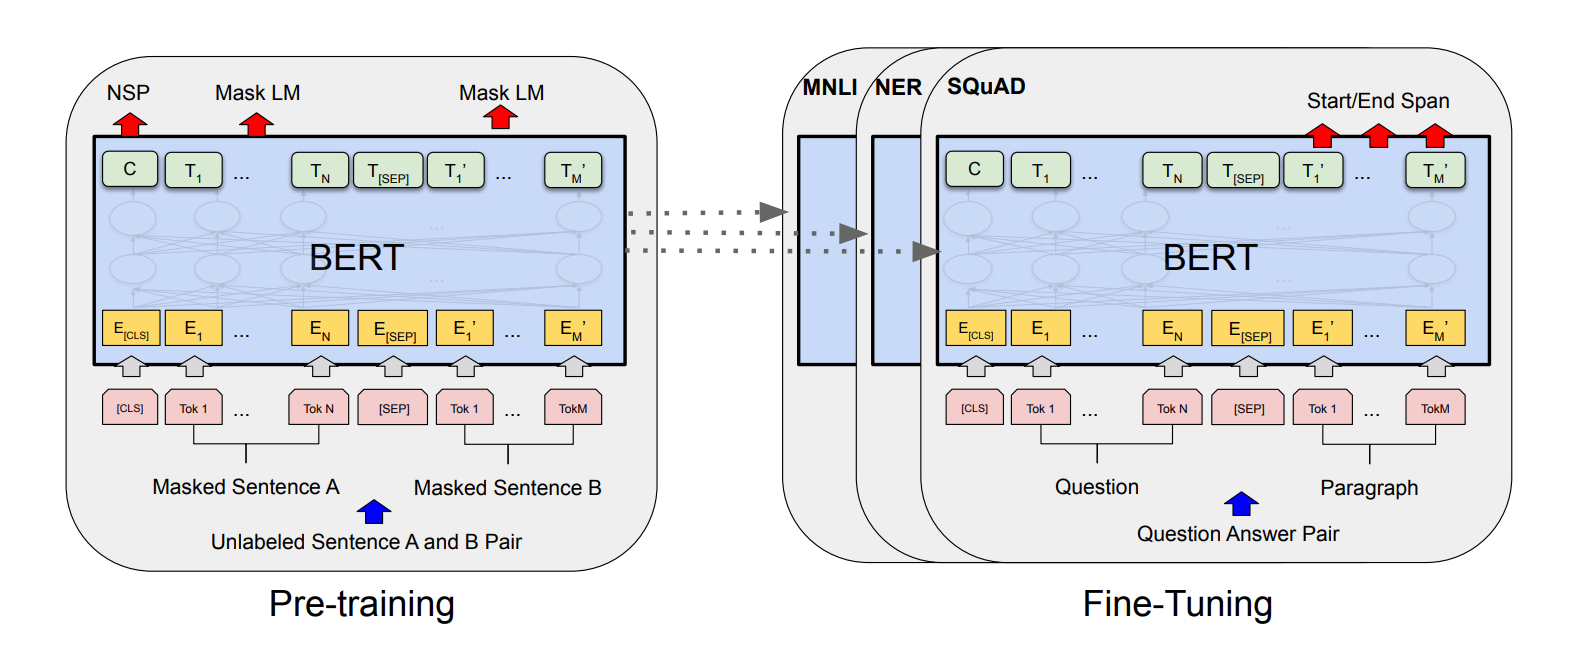

During the pre-training stage, BERT undergoes two steps, Masked Language Modeling (MLM) and Next Sentence Prediction (NSP). Prior to the MLM stage, BERT tokenizes and annotates the input sentences using the WordPiece embedding technique, with the first token of each sequence labeled as [CLS] and [SEP] used to indicate sentence boundaries.

In the MLM stage, BERT doesn't just mask 15% of the words, but rather splits the masked words into three parts: 80% of the words are replaced with the [MASK] token, 10% are replaced with a randomly selected word, and the remaining 10% are left unchanged. The model then learns to predict the original masked tokens based on the context of the surrounding tokens. The learning process of MLM is based on the transformer architecture. Unlike other language models, which consider only the left or right context, BERT uses a bidirectional approach that considers both the left and right context, which is important for many NLP tasks.

During the NSP stage, BERT trains the model to predict whether a sentence B follows sentence A, and labels the pairs as either **IsNext** or **NotNext**.

In the fine-tuning stage, BERT simply takes in specific inputs (in this case, binary classification of sentences) and applies them to the pre-trained model, adding a softmax layer to generate the desired output.

### 3.1.2 ROBERTA

Roberta is a modified version of the BERT model. The modifications made to the original BERT model are straightforward, which includes training the model for a longer period, with larger batches and on more data, removing the objective of predicting the next sentence(NSP), training the model on longer sequences, and dynamically changing the masking pattern used during training.

### 3.1.3 XLM

Cross-lingual language models (XLM) and BERT share a common framework that consists of both pre-training and fine-tuning stages. However, XLM is distinguished by its ability to handle multiple languages. The pre-training phase of XLM comprises two critical components: Masked Language Modeling (MLM) and Translation Language Modeling (TLM). MLM is akin to the masked language modeling technique employed by BERT and is based on the transformer architecture, with the additional inclusion of a language embedding indicating the language of each word. Notably, in the MLM pre-training stage of XLM, sentences are sourced from the same language. Conversely, the TLM objective expands MLM to pairs of parallel sentences. This objective aims to harness the shared semantic representations between corresponding sentences in distinct languages, thereby enhancing the model's capability to comprehend and translate across languages.

The fine-tuning stage of XLM involves training the model on specific downstream tasks, such as text classification or sequence labeling, as typically evaluated in empirical studies. During fine-tuning, the pre-trained XLM model is further optimized to enhance its performance on the specific task of interest. This process involves initializing the model parameters with the pre-trained weights and then updating them through backpropagation using task-specific loss functions.

An advantage of using XLM for fine-tuning is its capacity to handle multiple languages, enabling efficient training and improved performance on cross-lingual tasks. Moreover, XLM supports zero-shot transfer learning, facilitating the transfer of knowledge across languages without requiring any language-specific fine-tuning. 

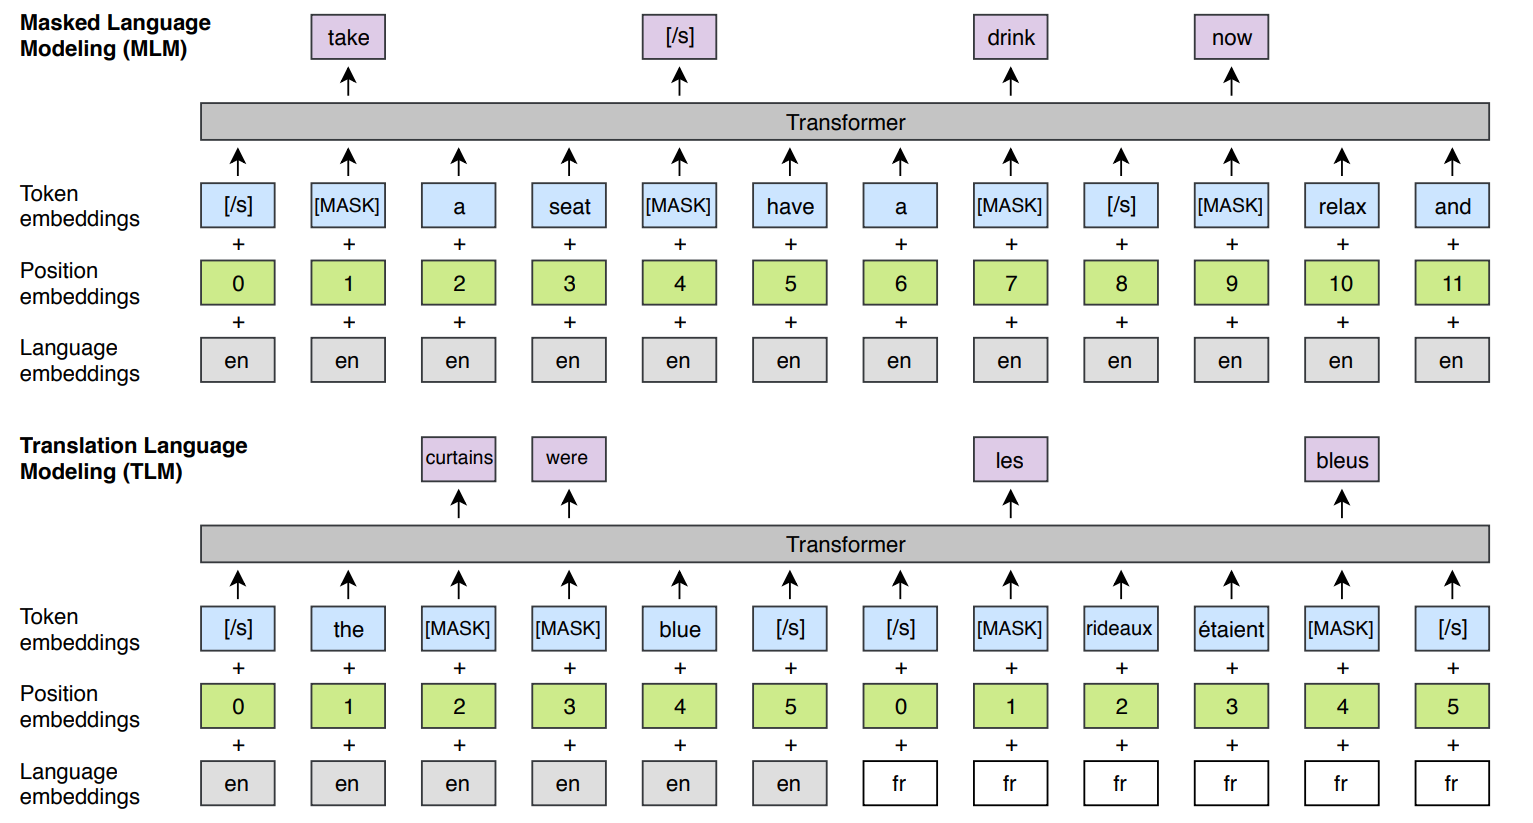

### 3.1.4 ALBERT

ALBERT is a pre-trained language model that utilizes two parameter reduction techniques, namely factorized embedding parameterization and cross-layer parameter sharing, to improve its parameter-efficiency and serve as a form of regularization. In addition, ALBERT introduces a self-supervised loss for sentence-order prediction (SOP) to address the shortcomings of the next sentence prediction (NSP) loss used in BERT and improve inter-sentence coherence. 

Factorized embedding parameterization involves untying the WordPiece embedding size (E) from the hidden layer size (H) in BERT. Instead of directly projecting the one-hot vectors into the hidden space of size H, we first project them into a lower dimensional embedding space of size E, and then project it to the hidden space, thus significantly reducing the number of embedding parameters when H >> E.

Cross-layer parameter sharing is another technique used to enhance parameter efficiency in ALBERT. Various ways to share parameters exist, including only sharing feed-forward network (FFN) parameters across layers or only sharing attention parameters. However, the default option in ALBERT is to share all parameters across layers.

In order to enhance the effectiveness of inter-sentence modeling, ALBERT dispenses with the next sentence prediction (NSP) stage and introduces a loss function that emphasizes coherence modeling. Specifically, we adopt a sentence-order prediction (SOP) loss that prioritizes inter-sentence coherence over topic prediction. Unlike NSP, which employs a positive example consisting of two segments that occur consecutively in the training corpus and a negative example created by randomly pairing segments from different documents, SOP employs a negative example created by reversing the order of the positive example's two consecutive segments.

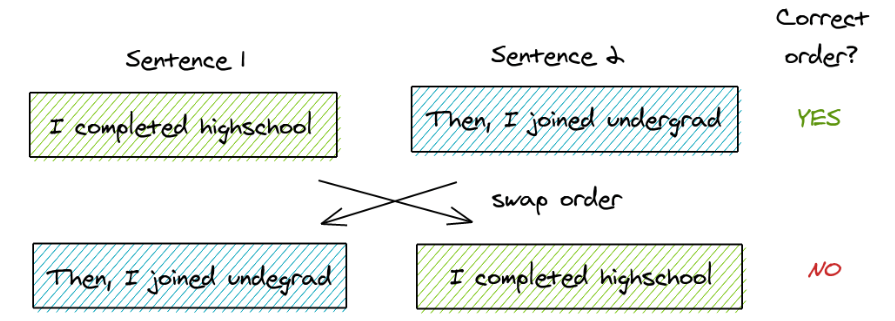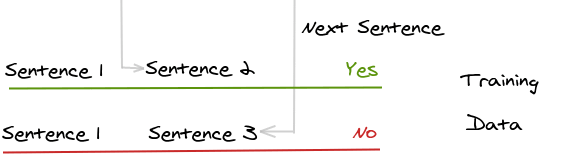

这两个图是从 https://amitness.com/2020/02/albert-visual-summary/#:~:text=Sentence%2DOrder%20Prediction%20(SOP),like%20%E2%80%9CNatural%20Language%20Inference%E2%80%9D 来的，最好不要直接用，得自己再画两个

## 3.2 Test and result

还没写,我有点看不大明白

**这个一定要跑，为了和drive同步**

### **BERT**

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/final proj/SST-2-sentiment-analysis-master')

In [ ]:
! pip3 install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


用SST训练

In [ ]:
from run_Bert_model import model_train_validate_test
import pandas as pd
from utils import Metric
import os

data_path = "/content/drive/MyDrive/Colab Notebooks/final proj/SST-2-sentiment-analysis-master/data"
train_df = pd.read_csv(os.path.join(data_path,"train.tsv"),sep='\t',header=None, names=['similarity','s1'])
dev_df = pd.read_csv(os.path.join(data_path,"dev.tsv"),sep='\t',header=None, names=['similarity','s1'])
test_df = pd.read_csv(os.path.join(data_path,"test.tsv"),sep='\t',header=None, names=['similarity','s1'])
target_dir = "/content/drive/MyDrive/Colab Notebooks/final proj/SST-2-sentiment-analysis-master/data/output/Bert/"

model_train_validate_test(train_df, dev_df, test_df, target_dir, 
         max_seq_len=50,
         epochs=3,
         batch_size=32,
         lr=2e-05,
         patience=1,
         max_grad_norm=10.0,
         if_save_model=True,
         checkpoint=None)

test_result = pd.read_csv(os.path.join(target_dir, 'test_prediction.csv'))
Metric(test_df.similarity, test_result.prediction) 

====================  Preparing for training  ====================
	* Loading training data...
	* Loading validation data...
	* Loading test data...
	* Building model...


/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(



* Validation loss before training: 0.3822, accuracy: 89.5642%, auc: 0.9547

 ==================== Training bert model on device: cuda ====================
* Training epoch 1:


Avg. batch proc. time: 0.2522s, loss: 0.1164: 100%|██████████| 217/217 [00:57<00:00,  3.75it/s]


-> Training time: 57.8907s, loss = 0.1164, accuracy: 95.4624%
* Validation for epoch 1:
-> Valid. time: 2.2019s, loss: 0.2712, accuracy: 91.2844%, auc: 0.9684

save model succesfully!

* Test for epoch 1:
Test accuracy: 0.9319%

* Training epoch 2:


Avg. batch proc. time: 0.2628s, loss: 0.0416: 100%|██████████| 217/217 [01:00<00:00,  3.59it/s]


-> Training time: 60.3828s, loss = 0.0416, accuracy: 98.6272%
* Validation for epoch 2:
-> Valid. time: 2.2555s, loss: 0.3219, accuracy: 91.7431%, auc: 0.9718

save model succesfully!

* Test for epoch 2:
Test accuracy: 0.9209%

* Training epoch 3:


Avg. batch proc. time: 0.2665s, loss: 0.0254: 100%|██████████| 217/217 [01:01<00:00,  3.55it/s]


-> Training time: 61.1531s, loss = 0.0254, accuracy: 99.1908%
* Validation for epoch 3:
-> Valid. time: 2.3258s, loss: 0.4009, accuracy: 91.0550%, auc: 0.9714

-> Early stopping: patience limit reached, stopping...
Accuracy: 92.1%
Precision: 92.2%
Recall: 92.1%
F1: 92.1%
classification_report:

              precision    recall  f1-score   support

     class_0      0.942     0.897     0.919       912
     class_1      0.901     0.945     0.923       909

    accuracy                          0.921      1821
   macro avg      0.922     0.921     0.921      1821
weighted avg      0.922     0.921     0.921      1821



用cola数据集训练

In [ ]:
from run_Bert_model import model_train_validate_test
import pandas as pd
from utils import Metric
import os

data_path = "/content/drive/MyDrive/Colab Notebooks/final proj/SST-2-sentiment-analysis-master/data"
train_df = pd.read_csv(os.path.join(data_path,"in_domain_train_processed.tsv"),sep='\t',header=None, names=['similarity','s1'])
dev_df = pd.read_csv(os.path.join(data_path,"in_domain_dev_processed.tsv"),sep='\t',header=None, names=['similarity','s1'])
test_df = pd.read_csv(os.path.join(data_path,"out_of_domain_dev_processed.tsv"),sep='\t',header=None, names=['similarity','s1'])
target_dir = "/content/drive/MyDrive/Colab Notebooks/final proj/SST-2-sentiment-analysis-master/data/output/Bert/"

model_train_validate_test(train_df, dev_df, test_df, target_dir, 
         max_seq_len=50,
         epochs=3,
         batch_size=32,
         lr=2e-05,
         patience=1,
         max_grad_norm=10.0,
         if_save_model=True,
         checkpoint=None)

test_result = pd.read_csv(os.path.join(target_dir, 'test_prediction.csv'))
Metric(test_df.similarity, test_result.prediction) 

====================  Preparing for training  ====================
	* Loading training data...
	* Loading validation data...
	* Loading test data...
	* Building model...


/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(



* Validation loss before training: 2.1761, accuracy: 42.6945%, auc: 0.5617

 ==================== Training bert model on device: cuda ====================
* Training epoch 1:


Avg. batch proc. time: 0.2491s, loss: 0.5518: 100%|██████████| 268/268 [01:10<00:00,  3.80it/s]


-> Training time: 70.6021s, loss = 0.5518, accuracy: 74.1083%
* Validation for epoch 1:
-> Valid. time: 1.3456s, loss: 0.5046, accuracy: 76.8501%, auc: 0.8809

save model succesfully!

* Test for epoch 1:
Test accuracy: 0.7558%

* Training epoch 2:


Avg. batch proc. time: 0.2604s, loss: 0.3685: 100%|██████████| 268/268 [01:13<00:00,  3.63it/s]


-> Training time: 73.7997s, loss = 0.3685, accuracy: 84.0720%
* Validation for epoch 2:
-> Valid. time: 1.4844s, loss: 0.4507, accuracy: 82.5427%, auc: 0.8902

save model succesfully!

* Test for epoch 2:
Test accuracy: 0.7926%

* Training epoch 3:


Avg. batch proc. time: 0.2655s, loss: 0.2301: 100%|██████████| 268/268 [01:15<00:00,  3.56it/s]


-> Training time: 75.2114s, loss = 0.2301, accuracy: 90.7145%
* Validation for epoch 3:
-> Valid. time: 1.4519s, loss: 0.4832, accuracy: 83.3017%, auc: 0.8868

save model succesfully!

* Test for epoch 3:
Test accuracy: 0.7946%

Accuracy: 79.5%
Precision: 79.8%
Recall: 70.3%
F1: 72.3%
classification_report:

              precision    recall  f1-score   support

     class_0      0.804     0.457     0.583       162
     class_1      0.792     0.949     0.864       354

    accuracy                          0.795       516
   macro avg      0.798     0.703     0.723       516
weighted avg      0.796     0.795     0.776       516



原因：‘in 1:注意到，这里面的句子看起来不是很长，有些错误是性别不符，有些是缺词、少词，有些是加s不加s的情况，各种语法错误。但我也注意到，有一些看起来错误并没有那么严重，甚至在某些情况还是可以说的通的。in 2:注意到，由于句子来源于电影评论，又有它们情感的人类注释，不同于CoLA的整体偏短，有些句子很长，有些句子很短，长短并不整齐划一。’

MRPC数据集：本任务的数据集，包含两句话，每个样本的句子长度都非常长，且数据不均衡，正样本占比68%，负样本仅占32%。

In [ ]:
from run_Bert_model import model_train_validate_test
import pandas as pd
from utils import Metric
import os

data_path = "/content/drive/MyDrive/Colab Notebooks/final proj/SST-2-sentiment-analysis-master/data"
train_df = pd.read_csv(os.path.join(data_path,"msr_paraphrase_train_edit.tsv"),sep='\t',header=None, names=['similarity','s1'])
dev_df = pd.read_csv(os.path.join(data_path,"msr_paraphrase_vali_edit.tsv"),sep='\t',header=None, names=['similarity','s1'])
test_df = pd.read_csv(os.path.join(data_path,"msr_paraphrase_test2_edit.tsv"),sep='\t',header=None, names=['similarity','s1'])
target_dir = "/content/drive/MyDrive/Colab Notebooks/final proj/SST-2-sentiment-analysis-master/data/output/Bert/"

model_train_validate_test(train_df, dev_df, test_df, target_dir, 
         max_seq_len=50,
         epochs=3,
         batch_size=32,
         lr=2e-05,
         patience=1,
         max_grad_norm=10.0,
         if_save_model=True,
         checkpoint=None)

test_result = pd.read_csv(os.path.join(target_dir, 'test_prediction.csv'))
Metric(test_df.similarity, test_result.prediction) 

====================  Preparing for training  ====================
	* Loading training data...


Token indices sequence length is longer than the specified maximum sequence length for this model (694 > 512). Running this sequence through the model will result in indexing errors


	* Loading validation data...
	* Loading test data...
	* Building model...


/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(



* Validation loss before training: 1.6043, accuracy: 44.9697%, auc: 0.5159

 ==================== Training bert model on device: cuda ====================
* Training epoch 1:


Avg. batch proc. time: 0.2566s, loss: 0.6059: 100%|██████████| 124/124 [00:33<00:00,  3.69it/s]


-> Training time: 33.5963s, loss = 0.6059, accuracy: 70.1161%
* Validation for epoch 1:
-> Valid. time: 2.0516s, loss: 0.5495, accuracy: 73.9394%, auc: 0.7595

save model succesfully!

* Test for epoch 1:
Test accuracy: 0.7406%

* Training epoch 2:


Avg. batch proc. time: 0.2627s, loss: 0.4688: 100%|██████████| 124/124 [00:34<00:00,  3.59it/s]


-> Training time: 34.5150s, loss = 0.4688, accuracy: 78.1928%
* Validation for epoch 2:
-> Valid. time: 2.1303s, loss: 0.5465, accuracy: 73.9394%, auc: 0.8050

save model succesfully!

* Test for epoch 2:
Test accuracy: 0.7430%

* Training epoch 3:


Avg. batch proc. time: 0.2673s, loss: 0.3080: 100%|██████████| 124/124 [00:35<00:00,  3.54it/s]


-> Training time: 35.0709s, loss = 0.3080, accuracy: 87.7082%
* Validation for epoch 3:
-> Valid. time: 2.1604s, loss: 0.5728, accuracy: 75.8788%, auc: 0.7990

save model succesfully!

* Test for epoch 3:
Test accuracy: 0.7491%

Accuracy: 74.9%
Precision: 71.3%
Recall: 72.7%
F1: 71.8%
classification_report:

              precision    recall  f1-score   support

     class_0      0.588     0.668     0.626       259
     class_1      0.838     0.786     0.811       566

    accuracy                          0.749       825
   macro avg      0.713     0.727     0.718       825
weighted avg      0.760     0.749     0.753       825



**本任务的数据集，包含两句话，每个样本的句子长度都非常长，且数据不均衡，正样本占比68%，负样本仅占32%。**

### **ROBERTA**

SST数据集

In [ ]:
from run_Roberta_model import model_train_validate_test
import pandas as pd
from utils import Metric
import os

data_path = "/content/drive/MyDrive/Colab Notebooks/final proj/SST-2-sentiment-analysis-master/data/"
train_df = pd.read_csv(os.path.join(data_path,"train.tsv"),sep='\t',header=None, names=['similarity','s1'])
dev_df = pd.read_csv(os.path.join(data_path,"dev.tsv"),sep='\t',header=None, names=['similarity','s1'])
test_df = pd.read_csv(os.path.join(data_path,"test.tsv"),sep='\t',header=None, names=['similarity','s1'])
target_dir = "/content/drive/My Drive/SST-2-sentiment-analysis/output/Roberta/"

model_train_validate_test(train_df, dev_df, test_df, target_dir, 
         max_seq_len=50,
         epochs=3,
         batch_size=32,
         lr=2e-05,
         patience=1,
         max_grad_norm=10.0,
         if_save_model=True,
         checkpoint=None)

test_result = pd.read_csv(os.path.join(target_dir, 'test_prediction.csv'))
Metric(test_df.similarity, test_result.prediction) 

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'roberta.pooler.dense.weight', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.weight', 'classi

====================  Preparing for training  ====================
	* Loading training data...
	* Loading validation data...
	* Loading test data...
	* Building model...


/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(



* Validation loss before training: 0.7044, accuracy: 49.0826%, auc: 0.4794

 ==================== Training bert model on device: cuda ====================
* Training epoch 1:


Avg. batch proc. time: 0.2589s, loss: 0.3436: 100%|██████████| 217/217 [00:59<00:00,  3.65it/s]


-> Training time: 59.4531s, loss = 0.3436, accuracy: 84.5087%
* Validation for epoch 1:
-> Valid. time: 2.3993s, loss: 0.2417, accuracy: 92.3165%, auc: 0.9722

save model succesfully!

* Test for epoch 1:
Test accuracy: 0.9242%

* Training epoch 2:


Avg. batch proc. time: 0.2681s, loss: 0.1725: 100%|██████████| 217/217 [01:01<00:00,  3.53it/s]


-> Training time: 61.5515s, loss = 0.1725, accuracy: 93.9306%
* Validation for epoch 2:
-> Valid. time: 2.2742s, loss: 0.2633, accuracy: 92.3165%, auc: 0.9746

save model succesfully!

* Test for epoch 2:
Test accuracy: 0.9456%

* Training epoch 3:


Avg. batch proc. time: 0.2718s, loss: 0.0956: 100%|██████████| 217/217 [01:02<00:00,  3.48it/s]


-> Training time: 62.4261s, loss = 0.0956, accuracy: 96.8497%
* Validation for epoch 3:
-> Valid. time: 2.2881s, loss: 0.3097, accuracy: 90.3670%, auc: 0.9742

-> Early stopping: patience limit reached, stopping...
Accuracy: 94.6%
Precision: 94.6%
Recall: 94.6%
F1: 94.6%
classification_report:

              precision    recall  f1-score   support

     class_0      0.954     0.936     0.945       912
     class_1      0.937     0.955     0.946       909

    accuracy                          0.946      1821
   macro avg      0.946     0.946     0.946      1821
weighted avg      0.946     0.946     0.946      1821



用cola数据集训练

In [ ]:
from run_Roberta_model import model_train_validate_test
import pandas as pd
from utils import Metric
import os

data_path = "/content/drive/MyDrive/Colab Notebooks/final proj/SST-2-sentiment-analysis-master/data/"
train_df = pd.read_csv(os.path.join(data_path,"in_domain_train_processed.tsv"),sep='\t',header=None, names=['similarity','s1'])
dev_df = pd.read_csv(os.path.join(data_path,"in_domain_dev_processed.tsv"),sep='\t',header=None, names=['similarity','s1'])
test_df = pd.read_csv(os.path.join(data_path,"out_of_domain_dev_processed.tsv"),sep='\t',header=None, names=['similarity','s1'])
target_dir = "/content/drive/My Drive/SST-2-sentiment-analysis/output/Roberta/"

model_train_validate_test(train_df, dev_df, test_df, target_dir, 
         max_seq_len=50,
         epochs=3,
         batch_size=32,
         lr=2e-05,
         patience=1,
         max_grad_norm=10.0,
         if_save_model=True,
         checkpoint=None)

test_result = pd.read_csv(os.path.join(target_dir, 'test_prediction.csv'))
Metric(test_df.similarity, test_result.prediction) 

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'roberta.pooler.dense.weight', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.weight', 'classi

====================  Preparing for training  ====================
	* Loading training data...
	* Loading validation data...
	* Loading test data...
	* Building model...


/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(



* Validation loss before training: 0.7115, accuracy: 30.7400%, auc: 0.5393

 ==================== Training bert model on device: cuda ====================
* Training epoch 1:


Avg. batch proc. time: 0.2688s, loss: 0.5094: 100%|██████████| 268/268 [01:16<00:00,  3.52it/s]


-> Training time: 76.0496s, loss = 0.5094, accuracy: 75.1842%
* Validation for epoch 1:
-> Valid. time: 1.4096s, loss: 0.3733, accuracy: 84.6300%, auc: 0.9042

save model succesfully!

* Test for epoch 1:
Test accuracy: 0.7926%

* Training epoch 2:


Avg. batch proc. time: 0.2701s, loss: 0.3298: 100%|██████████| 268/268 [01:16<00:00,  3.50it/s]


-> Training time: 76.5017s, loss = 0.3298, accuracy: 86.0835%
* Validation for epoch 2:
-> Valid. time: 1.3960s, loss: 0.4397, accuracy: 84.8197%, auc: 0.9223

save model succesfully!

* Test for epoch 2:
Test accuracy: 0.8023%

* Training epoch 3:


Avg. batch proc. time: 0.2739s, loss: 0.2291: 100%|██████████| 268/268 [01:17<00:00,  3.45it/s]


-> Training time: 77.6979s, loss = 0.2291, accuracy: 91.3928%
* Validation for epoch 3:
-> Valid. time: 1.3940s, loss: 0.3870, accuracy: 85.9583%, auc: 0.9200

save model succesfully!

* Test for epoch 3:
Test accuracy: 0.7907%

Accuracy: 79.1%
Precision: 76.1%
Recall: 73.7%
F1: 74.6%
classification_report:

              precision    recall  f1-score   support

     class_0      0.696     0.593     0.640       162
     class_1      0.825     0.881     0.852       354

    accuracy                          0.791       516
   macro avg      0.761     0.737     0.746       516
weighted avg      0.785     0.791     0.786       516



MRPC数据集

In [ ]:
from run_Roberta_model import model_train_validate_test
import pandas as pd
from utils import Metric
import os

data_path = "/content/drive/MyDrive/Colab Notebooks/final proj/SST-2-sentiment-analysis-master/data/"
train_df = pd.read_csv(os.path.join(data_path,"msr_paraphrase_train_edit.tsv"),sep='\t',header=None, names=['similarity','s1'])
dev_df = pd.read_csv(os.path.join(data_path,"msr_paraphrase_vali_edit.tsv"),sep='\t',header=None, names=['similarity','s1'])
test_df = pd.read_csv(os.path.join(data_path,"msr_paraphrase_test2_edit.tsv"),sep='\t',header=None, names=['similarity','s1'])
target_dir = "/content/drive/My Drive/SST-2-sentiment-analysis/output/Roberta/"

model_train_validate_test(train_df, dev_df, test_df, target_dir, 
         max_seq_len=50,
         epochs=3,
         batch_size=32,
         lr=2e-05,
         patience=1,
         max_grad_norm=10.0,
         if_save_model=True,
         checkpoint=None)

test_result = pd.read_csv(os.path.join(target_dir, 'test_prediction.csv'))
Metric(test_df.similarity, test_result.prediction) 

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'roberta.pooler.dense.weight', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.weight', 'classi

====================  Preparing for training  ====================
	* Loading training data...


Token indices sequence length is longer than the specified maximum sequence length for this model (742 > 512). Running this sequence through the model will result in indexing errors


	* Loading validation data...
	* Loading test data...
	* Building model...


/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(



* Validation loss before training: 0.6712, accuracy: 64.4848%, auc: 0.4905

 ==================== Training bert model on device: cuda ====================
* Training epoch 1:


Avg. batch proc. time: 0.2788s, loss: 0.5879: 100%|██████████| 124/124 [00:36<00:00,  3.39it/s]


-> Training time: 36.5651s, loss = 0.5879, accuracy: 69.0308%
* Validation for epoch 1:
-> Valid. time: 2.2115s, loss: 0.5554, accuracy: 73.3333%, auc: 0.7722

save model succesfully!

* Test for epoch 1:
Test accuracy: 0.7733%

* Training epoch 2:


Avg. batch proc. time: 0.2773s, loss: 0.4435: 100%|██████████| 124/124 [00:36<00:00,  3.41it/s]


-> Training time: 36.3906s, loss = 0.4435, accuracy: 79.9344%
* Validation for epoch 2:
-> Valid. time: 2.2014s, loss: 0.5095, accuracy: 78.3030%, auc: 0.8470

save model succesfully!

* Test for epoch 2:
Test accuracy: 0.8376%

* Training epoch 3:


Avg. batch proc. time: 0.2839s, loss: 0.3124: 100%|██████████| 124/124 [00:37<00:00,  3.33it/s]


-> Training time: 37.1934s, loss = 0.3124, accuracy: 87.5315%
* Validation for epoch 3:
-> Valid. time: 2.2146s, loss: 0.5872, accuracy: 80.0000%, auc: 0.8545

save model succesfully!

* Test for epoch 3:
Test accuracy: 0.8327%

Accuracy: 83.3%
Precision: 82.4%
Recall: 77.3%
F1: 79.1%
classification_report:

              precision    recall  f1-score   support

     class_0      0.807     0.614     0.697       259
     class_1      0.841     0.933     0.884       566

    accuracy                          0.833       825
   macro avg      0.824     0.773     0.791       825
weighted avg      0.830     0.833     0.826       825



### ***XLM***

SST

In [ ]:
from run_Xlnet_model import model_train_validate_test
import pandas as pd
from utils import Metric
import os

data_path = /content/drive/MyDrive/Colab Notebooks/final proj/SST-2-sentiment-analysis-master/data/
train_df = pd.read_csv(os.path.join(data_path,"train.tsv"),sep='\t',header=None, names=['similarity','s1'])
dev_df = pd.read_csv(os.path.join(data_path,"dev.tsv"),sep='\t',header=None, names=['similarity','s1'])
test_df = pd.read_csv(os.path.join(data_path,"test.tsv"),sep='\t',header=None, names=['similarity','s1'])
target_dir = "/content/drive/My Drive/SST-2-sentiment-analysis/output/Xlnet/"

model_train_validate_test(train_df, dev_df, test_df, target_dir, 
         max_seq_len=50,
         epochs=3,
         batch_size=32,
         lr=2e-05,
         patience=1,
         max_grad_norm=10.0,
         if_save_model=False,
         checkpoint=None)

test_result = pd.read_csv(os.path.join(target_dir, 'test_prediction.csv'))
Metric(test_df.similarity, test_result.prediction) 

Some weights of the model checkpoint at xlnet-large-cased were not used when initializing XLNetForSequenceClassification: ['lm_loss.weight', 'lm_loss.bias']
- This IS expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-large-cased and are newly initialized: ['logits_proj.weight', 'sequence_summary.summary.bias', 'logits_proj.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions

====================  Preparing for training  ====================
	* Loading training data...
	* Loading validation data...
	* Loading test data...
	* Building model...


/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(



* Validation loss before training: 0.7148, accuracy: 50.3440%, auc: 0.5046

 ==================== Training bert model on device: cuda ====================
* Training epoch 1:


Avg. batch proc. time: 1.1381s, loss: 0.3855: 100%|██████████| 217/217 [04:08<00:00,  1.15s/it]


-> Training time: 248.7147s, loss = 0.3855, accuracy: 80.6214%
* Validation for epoch 1:
-> Valid. time: 10.7121s, loss: 0.2118, accuracy: 92.3165%, auc: 0.9816

* Test for epoch 1:
Test accuracy: 0.9379%

* Training epoch 2:


Avg. batch proc. time: 1.1834s, loss: 0.1755: 100%|██████████| 217/217 [04:18<00:00,  1.19s/it]


-> Training time: 258.5073s, loss = 0.1755, accuracy: 93.7717%
* Validation for epoch 2:
-> Valid. time: 10.7919s, loss: 0.1838, accuracy: 93.2339%, auc: 0.9821

* Test for epoch 2:
Test accuracy: 0.9396%

* Training epoch 3:


Avg. batch proc. time: 1.1851s, loss: 0.1009: 100%|██████████| 217/217 [04:18<00:00,  1.19s/it]


-> Training time: 258.8914s, loss = 0.1009, accuracy: 96.9653%
* Validation for epoch 3:
-> Valid. time: 10.7802s, loss: 0.1899, accuracy: 94.8394%, auc: 0.9830

* Test for epoch 3:
Test accuracy: 0.9511%

Accuracy: 95.1%
Precision: 95.1%
Recall: 95.1%
F1: 95.1%
classification_report:

              precision    recall  f1-score   support

     class_0      0.963     0.939     0.951       912
     class_1      0.940     0.964     0.952       909

    accuracy                          0.951      1821
   macro avg      0.951     0.951     0.951      1821
weighted avg      0.951     0.951     0.951      1821



COLA

In [ ]:
from run_Xlnet_model import model_train_validate_test
import pandas as pd
from utils import Metric
import os

data_path = '/content/drive/MyDrive/Colab Notebooks/final proj/SST-2-sentiment-analysis-master/data/'
train_df = pd.read_csv(os.path.join(data_path,"in_domain_train_processed.tsv"),sep='\t',header=None, names=['similarity','s1'])
dev_df = pd.read_csv(os.path.join(data_path,"in_domain_dev_processed.tsv"),sep='\t',header=None, names=['similarity','s1'])
test_df = pd.read_csv(os.path.join(data_path,"out_of_domain_dev_processed.tsv"),sep='\t',header=None, names=['similarity','s1'])
target_dir = "/content/drive/My Drive/SST-2-sentiment-analysis/output/Xlnet/"

model_train_validate_test(train_df, dev_df, test_df, target_dir, 
         max_seq_len=50,
         epochs=3,
         batch_size=32,
         lr=2e-05,
         patience=1,
         max_grad_norm=10.0,
         if_save_model=False,
         checkpoint=None)

test_result = pd.read_csv(os.path.join(target_dir, 'test_prediction.csv'))
Metric(test_df.similarity, test_result.prediction) 

Some weights of the model checkpoint at xlnet-large-cased were not used when initializing XLNetForSequenceClassification: ['lm_loss.weight', 'lm_loss.bias']
- This IS expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-large-cased and are newly initialized: ['logits_proj.weight', 'sequence_summary.summary.bias', 'logits_proj.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions

====================  Preparing for training  ====================
	* Loading training data...
	* Loading validation data...
	* Loading test data...
	* Building model...


/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(



* Validation loss before training: 0.8203, accuracy: 33.5863%, auc: 0.5041

 ==================== Training bert model on device: cuda ====================
* Training epoch 1:


Avg. batch proc. time: 1.1377s, loss: 0.6266: 100%|██████████| 268/268 [05:06<00:00,  1.15s/it]


-> Training time: 306.9523s, loss = 0.6266, accuracy: 69.6995%
* Validation for epoch 1:
-> Valid. time: 6.4990s, loss: 0.6199, accuracy: 69.2600%, auc: 0.6221

* Test for epoch 1:
Test accuracy: 0.6860%

* Training epoch 2:


Avg. batch proc. time: 1.1429s, loss: 0.6202: 100%|██████████| 268/268 [05:08<00:00,  1.15s/it]


-> Training time: 308.3671s, loss = 0.6202, accuracy: 70.1789%
* Validation for epoch 2:
-> Valid. time: 6.5092s, loss: 0.6178, accuracy: 69.2600%, auc: 0.6232

* Test for epoch 2:
Test accuracy: 0.6860%

* Training epoch 3:


Avg. batch proc. time: 1.1441s, loss: 0.6188: 100%|██████████| 268/268 [05:08<00:00,  1.15s/it]


-> Training time: 308.7033s, loss = 0.6188, accuracy: 69.9450%
* Validation for epoch 3:
-> Valid. time: 6.4361s, loss: 0.6374, accuracy: 69.2600%, auc: 0.6389

* Test for epoch 3:
Test accuracy: 0.6860%

Accuracy: 68.6%
Precision: 34.3%
Recall: 50.0%
F1: 40.7%
classification_report:

              precision    recall  f1-score   support

     class_0      0.000     0.000     0.000       162
     class_1      0.686     1.000     0.814       354

    accuracy                          0.686       516
   macro avg      0.343     0.500     0.407       516
weighted avg      0.471     0.686     0.558       516



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: 

MRPC

In [ ]:
from run_Xlnet_model import model_train_validate_test
import pandas as pd
from utils import Metric
import os

data_path = '/content/drive/MyDrive/Colab Notebooks/final proj/SST-2-sentiment-analysis-master/data/'
train_df = pd.read_csv(os.path.join(data_path,"msr_paraphrase_train_edit.tsv"),sep='\t',header=None, names=['similarity','s1'])
dev_df = pd.read_csv(os.path.join(data_path,"msr_paraphrase_vali_edit.tsv"),sep='\t',header=None, names=['similarity','s1'])
test_df = pd.read_csv(os.path.join(data_path,"msr_paraphrase_test2_edit.tsv"),sep='\t',header=None, names=['similarity','s1'])
target_dir = "/content/drive/My Drive/SST-2-sentiment-analysis/output/Xlnet/"

model_train_validate_test(train_df, dev_df, test_df, target_dir, 
         max_seq_len=50,
         epochs=3,
         batch_size=32,
         lr=2e-05,
         patience=1,
         max_grad_norm=10.0,
         if_save_model=False,
         checkpoint=None)

test_result = pd.read_csv(os.path.join(target_dir, 'test_prediction.csv'))
Metric(test_df.similarity, test_result.prediction)

Some weights of the model checkpoint at xlnet-large-cased were not used when initializing XLNetForSequenceClassification: ['lm_loss.weight', 'lm_loss.bias']
- This IS expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-large-cased and are newly initialized: ['logits_proj.weight', 'sequence_summary.summary.bias', 'logits_proj.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions

====================  Preparing for training  ====================
	* Loading training data...
	* Loading validation data...
	* Loading test data...
	* Building model...


/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(



* Validation loss before training: 0.8100, accuracy: 37.9394%, auc: 0.4448

 ==================== Training bert model on device: cuda ====================
* Training epoch 1:


Avg. batch proc. time: 1.2249s, loss: 0.6113: 100%|██████████| 124/124 [02:32<00:00,  1.23s/it]


-> Training time: 152.8259s, loss = 0.6113, accuracy: 68.2231%
* Validation for epoch 1:
-> Valid. time: 10.1550s, loss: 0.6027, accuracy: 70.5455%, auc: 0.7622

* Test for epoch 1:
Test accuracy: 0.7552%

* Training epoch 2:


Avg. batch proc. time: 1.2221s, loss: 0.4911: 100%|██████████| 124/124 [02:32<00:00,  1.23s/it]


-> Training time: 152.5071s, loss = 0.4911, accuracy: 76.6532%
* Validation for epoch 2:
-> Valid. time: 10.1491s, loss: 0.4525, accuracy: 79.7576%, auc: 0.8555

* Test for epoch 2:
Test accuracy: 0.7964%

* Training epoch 3:


Avg. batch proc. time: 1.2195s, loss: 0.3359: 100%|██████████| 124/124 [02:32<00:00,  1.23s/it]


-> Training time: 152.2022s, loss = 0.3359, accuracy: 86.5472%
* Validation for epoch 3:
-> Valid. time: 10.1636s, loss: 0.6996, accuracy: 77.5758%, auc: 0.8650

-> Early stopping: patience limit reached, stopping...
Accuracy: 79.6%
Precision: 76.9%
Recall: 74.1%
F1: 75.1%
classification_report:

              precision    recall  f1-score   support

     class_0      0.712     0.591     0.646       259
     class_1      0.826     0.890     0.857       566

    accuracy                          0.796       825
   macro avg      0.769     0.741     0.751       825
weighted avg      0.790     0.796     0.791       825



### ***ALBERT***

Despite having 18 times fewer parameters than BERT-large, ALBERT maintains its performance and can be trained 1.7 times faster.

ALBERT's results demonstrate that NSP cannot solve the SOP task at all, as it learns the easier topic-prediction signal and performs at random baseline level on the SOP task. In contrast, SOP can solve the NSP task to a reasonable degree, presumably based on analyzing misaligned coherence cues. Consequently, ALBERT models consistently improve downstream task performance for multi-sentence encoding tasks.

SST

In [ ]:
from run_Albert_model import model_train_validate_test
import pandas as pd
from utils import Metric
import os

data_path = '/content/drive/MyDrive/Colab Notebooks/final proj/SST-2-sentiment-analysis-master/data/'
train_df = pd.read_csv(os.path.join(data_path,"train.tsv"),sep='\t',header=None, names=['similarity','s1'])
dev_df = pd.read_csv(os.path.join(data_path,"dev.tsv"),sep='\t',header=None, names=['similarity','s1'])
test_df = pd.read_csv(os.path.join(data_path,"test.tsv"),sep='\t',header=None, names=['similarity','s1'])
target_dir = "/content/drive/My Drive/SST-2-sentiment-analysis/output/Albert/"

model_train_validate_test(train_df, dev_df, test_df, target_dir, 
         max_seq_len=50,
         epochs=3,
         batch_size=32,
         lr=2e-05,
         patience=1,
         max_grad_norm=10.0,
         if_save_model=True,
         checkpoint=None)

test_result = pd.read_csv(os.path.join(target_dir, 'test_prediction.csv'))
Metric(test_df.similarity, test_result.prediction) 

Some weights of the model checkpoint at albert-xxlarge-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.decoder.weight', 'predictions.LayerNorm.weight', 'predictions.bias', 'predictions.dense.bias', 'predictions.decoder.bias', 'predictions.dense.weight', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-xxlarge-v2 and are newly initialized: ['classifier.weight', 'classifier.bias']
Y

====================  Preparing for training  ====================
	* Loading training data...
	* Loading validation data...
	* Loading test data...
	* Building model...


/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(



* Validation loss before training: 1.2672, accuracy: 53.2110%, auc: 0.5338

 ==================== Training bert model on device: cuda ====================
* Training epoch 1:


Avg. batch proc. time: 3.5497s, loss: 0.3359: 100%|██████████| 217/217 [24:45<00:00,  6.85s/it]


-> Training time: 1485.4713s, loss = 0.3359, accuracy: 86.2139%
* Validation for epoch 1:
-> Valid. time: 73.1173s, loss: 0.3403, accuracy: 88.1881%, auc: 0.9735

save model succesfully!

* Test for epoch 1:
Test accuracy: 0.8968%

* Training epoch 2:


Avg. batch proc. time: 3.5209s, loss: 0.4735: 100%|██████████| 217/217 [24:41<00:00,  6.83s/it]


-> Training time: 1481.5912s, loss = 0.4735, accuracy: 69.9855%
* Validation for epoch 2:
-> Valid. time: 70.0841s, loss: 0.6905, accuracy: 54.7018%, auc: 0.5634

-> Early stopping: patience limit reached, stopping...
Accuracy: 89.7%
Precision: 91.3%
Recall: 89.7%
F1: 89.6%
classification_report:

              precision    recall  f1-score   support

     class_0      0.832     0.995     0.906       912
     class_1      0.993     0.799     0.885       909

    accuracy                          0.897      1821
   macro avg      0.913     0.897     0.896      1821
weighted avg      0.913     0.897     0.896      1821



COLA

In [ ]:
from run_Albert_model import model_train_validate_test
import pandas as pd
from utils import Metric
import os

data_path = '/content/drive/MyDrive/Colab Notebooks/final proj/SST-2-sentiment-analysis-master/data/'
train_df = pd.read_csv(os.path.join(data_path,"in_domain_train_processed.tsv"),sep='\t',header=None, names=['similarity','s1'])
dev_df = pd.read_csv(os.path.join(data_path,"in_domain_dev_processed.tsv"),sep='\t',header=None, names=['similarity','s1'])
test_df = pd.read_csv(os.path.join(data_path,"out_of_domain_dev_processed.tsv"),sep='\t',header=None, names=['similarity','s1'])
target_dir = "/content/drive/My Drive/SST-2-sentiment-analysis/output/Albert/"

model_train_validate_test(train_df, dev_df, test_df, target_dir, 
         max_seq_len=50,
         epochs=3,
         batch_size=32,
         lr=2e-05,
         patience=1,
         max_grad_norm=10.0,
         if_save_model=True,
         checkpoint=None)

test_result = pd.read_csv(os.path.join(target_dir, 'test_prediction.csv'))
Metric(test_df.similarity, test_result.prediction) 

Some weights of the model checkpoint at albert-xxlarge-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.LayerNorm.weight', 'predictions.dense.weight', 'predictions.decoder.bias', 'predictions.LayerNorm.bias', 'predictions.bias', 'predictions.decoder.weight', 'predictions.dense.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-xxlarge-v2 and are newly initialized: ['classifier.weight', 'classifier.bias']
Y

====================  Preparing for training  ====================
	* Loading training data...
	* Loading validation data...
	* Loading test data...
	* Building model...


/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(



* Validation loss before training: 0.8503, accuracy: 59.5825%, auc: 0.5038

 ==================== Training bert model on device: cuda ====================
* Training epoch 1:


Avg. batch proc. time: 0.5963s, loss: 0.6411: 100%|██████████| 268/268 [06:07<00:00,  1.37s/it]


-> Training time: 367.2883s, loss = 0.6411, accuracy: 67.8868%
* Validation for epoch 1:
-> Valid. time: 7.6466s, loss: 0.6186, accuracy: 69.2600%, auc: 0.4709

save model succesfully!

* Test for epoch 1:
Test accuracy: 0.6860%

* Training epoch 2:


Avg. batch proc. time: 0.5961s, loss: 0.6242: 100%|██████████| 268/268 [06:07<00:00,  1.37s/it]


-> Training time: 367.2393s, loss = 0.6242, accuracy: 69.8398%
* Validation for epoch 2:
-> Valid. time: 7.6468s, loss: 0.6133, accuracy: 69.2600%, auc: 0.5254

save model succesfully!

* Test for epoch 2:
Test accuracy: 0.6860%

* Training epoch 3:


Avg. batch proc. time: 0.5960s, loss: 0.6169: 100%|██████████| 268/268 [06:07<00:00,  1.37s/it]


-> Training time: 367.2302s, loss = 0.6169, accuracy: 70.4011%
* Validation for epoch 3:
-> Valid. time: 7.6565s, loss: 0.6204, accuracy: 69.2600%, auc: 0.5012

save model succesfully!

* Test for epoch 3:
Test accuracy: 0.6860%

Accuracy: 68.6%
Precision: 34.3%
Recall: 50.0%
F1: 40.7%
classification_report:

              precision    recall  f1-score   support

     class_0      0.000     0.000     0.000       162
     class_1      0.686     1.000     0.814       354

    accuracy                          0.686       516
   macro avg      0.343     0.500     0.407       516
weighted avg      0.471     0.686     0.558       516



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: 

MRPC

In [ ]:
from run_Albert_model import model_train_validate_test
import pandas as pd
from utils import Metric
import os

data_path = '/content/drive/MyDrive/Colab Notebooks/final proj/SST-2-sentiment-analysis-master/data/'
train_df = pd.read_csv(os.path.join(data_path,"msr_paraphrase_train_edit.tsv"),sep='\t',header=None, names=['similarity','s1'])
dev_df = pd.read_csv(os.path.join(data_path,"msr_paraphrase_vali_edit.tsv"),sep='\t',header=None, names=['similarity','s1'])
test_df = pd.read_csv(os.path.join(data_path,"msr_paraphrase_test2_edit.tsv"),sep='\t',header=None, names=['similarity','s1'])
target_dir = "/content/drive/My Drive/SST-2-sentiment-analysis/output/Albert/"

model_train_validate_test(train_df, dev_df, test_df, target_dir, 
         max_seq_len=50,
         epochs=3,
         batch_size=32,
         lr=2e-05,
         patience=1,
         max_grad_norm=10.0,
         if_save_model=True,
         checkpoint=None)

test_result = pd.read_csv(os.path.join(target_dir, 'test_prediction.csv'))
Metric(test_df.similarity, test_result.prediction) 

Some weights of the model checkpoint at albert-xxlarge-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.bias', 'predictions.decoder.weight', 'predictions.dense.weight', 'predictions.LayerNorm.bias', 'predictions.LayerNorm.weight', 'predictions.bias', 'predictions.decoder.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-xxlarge-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
Y

====================  Preparing for training  ====================
	* Loading training data...


Token indices sequence length is longer than the specified maximum sequence length for this model (692 > 512). Running this sequence through the model will result in indexing errors


	* Loading validation data...
	* Loading test data...
	* Building model...


/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(



* Validation loss before training: 0.8551, accuracy: 57.2121%, auc: 0.4802

 ==================== Training bert model on device: cuda ====================
* Training epoch 1:


Avg. batch proc. time: 3.6348s, loss: 0.6775: 100%|██████████| 124/124 [14:47<00:00,  7.16s/it]


-> Training time: 887.2705s, loss = 0.6775, accuracy: 63.6295%
* Validation for epoch 1:
-> Valid. time: 68.7642s, loss: 0.7731, accuracy: 64.4848%, auc: 0.6634

save model succesfully!

* Test for epoch 1:
Test accuracy: 0.6861%

* Training epoch 2:


Avg. batch proc. time: 3.6258s, loss: 0.6185: 100%|██████████| 124/124 [14:46<00:00,  7.15s/it]


-> Training time: 886.1705s, loss = 0.6185, accuracy: 68.1222%
* Validation for epoch 2:
-> Valid. time: 68.6475s, loss: 0.6252, accuracy: 68.7273%, auc: 0.7233

save model succesfully!

* Test for epoch 2:
Test accuracy: 0.7273%

* Training epoch 3:


Avg. batch proc. time: 3.6366s, loss: 0.5539: 100%|██████████| 124/124 [14:48<00:00,  7.17s/it]


-> Training time: 888.5440s, loss = 0.5539, accuracy: 72.8925%
* Validation for epoch 3:
-> Valid. time: 68.6276s, loss: 0.6032, accuracy: 57.3333%, auc: 0.6853

-> Early stopping: patience limit reached, stopping...
Accuracy: 72.7%
Precision: 77.4%
Recall: 57.5%
F1: 55.4%
classification_report:

              precision    recall  f1-score   support

     class_0      0.827     0.166     0.277       259
     class_1      0.721     0.984     0.832       566

    accuracy                          0.727       825
   macro avg      0.774     0.575     0.554       825
weighted avg      0.754     0.727     0.658       825



# 4. 对比分析

先比较模型的不同，再比较结果，估计得简单做个表格什么的

# 5. Conclusion

解释为什么会有这种程度的不同

# 6.***Limitations***

Some limitations of the papers include:

The models require a large amount of training data and computational resources.
They are prone to generating plausible-sounding but incorrect or nonsensical text.
They have difficulty in handling out-of-vocabulary words and rare or unseen words.
There is limited interpretability and explainability of the self-attention mechanism.

局限性：
基于Transformer的模型的局限性在于，它们需要大量的预训练数据和计算资源，这使得较小的研究小组或个人不容易获得。另一个限制是，这些模型可能不能很好地推广到新的任务或领域，需要进行大量的微调工作。
我们只从classification这个方向比较了这几个模型，但他们还能在别的领域做别的事情。



1.需要大量的预训练数据和计算资源，这使得较小的研究小组或个人不容易获得，因此我们使用了较小型的dataset，无法统计在有大量数据支持的情况下的算法的表现


2.我们只从binary-classification的方向比较了这几个模型，但NLP的工作还有很多其他维度的考验，比如句子生成，回答问题之类的。

# 7.***Future directions***

Based on the limitations, the following directions can be considered for future research:

Investigate techniques for improving the efficiency and reducing the computational requirements of the models, allowing them to be trained on less data and with fewer resources.
Explore methods for increasing the robustness of the models to noisy or out-of-domain input text.
Develop approaches to improve the interpretability and explainability of the self-attention mechanism.
Investigate methods for fine-tuning and adapting the models to specific tasks or domains with limited data.
Explore ways to incorporate additional sources of information, such as knowledge graphs, to improve the model's understanding of context and semantics.

基于这些局限性，在未来的研究中可以考虑以下方向：

研究提高模型效率和降低计算要求的技术，使其能够在更少的数据和更少的资源上进行训练。
探索提高模型对噪声或域外输入文本的稳健性的方法。
制定方法来提高自我注意机制的可解释性和可说明性。
研究如何在数据有限的情况下对模型进行微调并使之适应特定的任务或领域。
探讨如何纳入额外的信息来源，如知识图谱，以提高模型对背景和语义的理解。

# Reference


# Appendix